In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging

In [2]:
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib').setLevel(logging.ERROR)
logging.getLogger('matplotlib.font_manager').disabled = True
plt.style.use("ggplot")

In [4]:
df = pd.read_csv('heart_disease.csv')
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
number_columns = df.select_dtypes(include='number').columns.tolist()
print(number_columns)
print(len(number_columns))

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
14


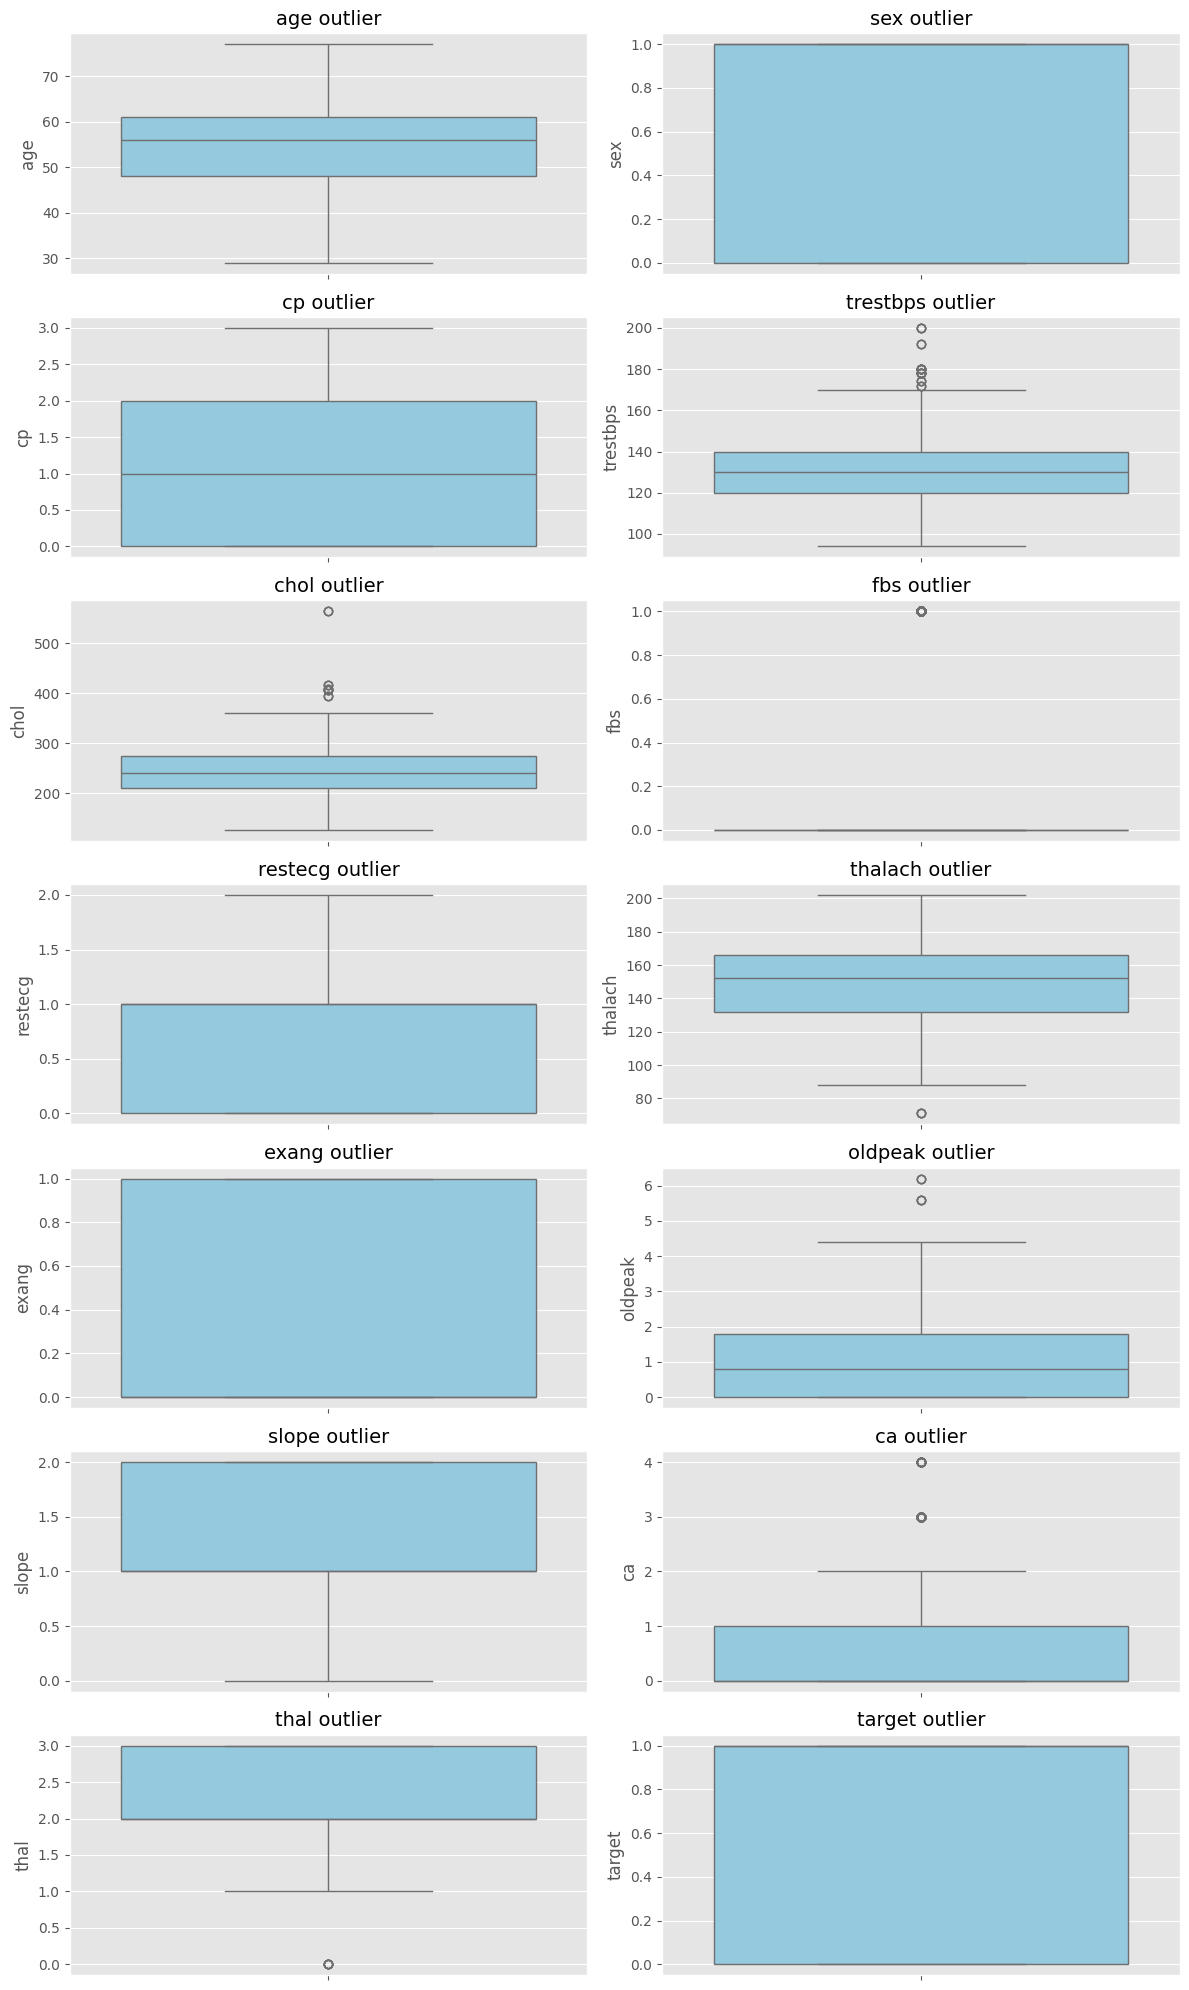

In [9]:
plt.figure(figsize=(12, 20))
for idx, col in enumerate(number_columns, 1):
    plt.subplot(len(number_columns)//2, 2, idx)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} outlier', fontsize=14)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [10]:
for col in number_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [11]:
no_disease = df[df['target'] == 0]
disease = df[df['target'] == 1]

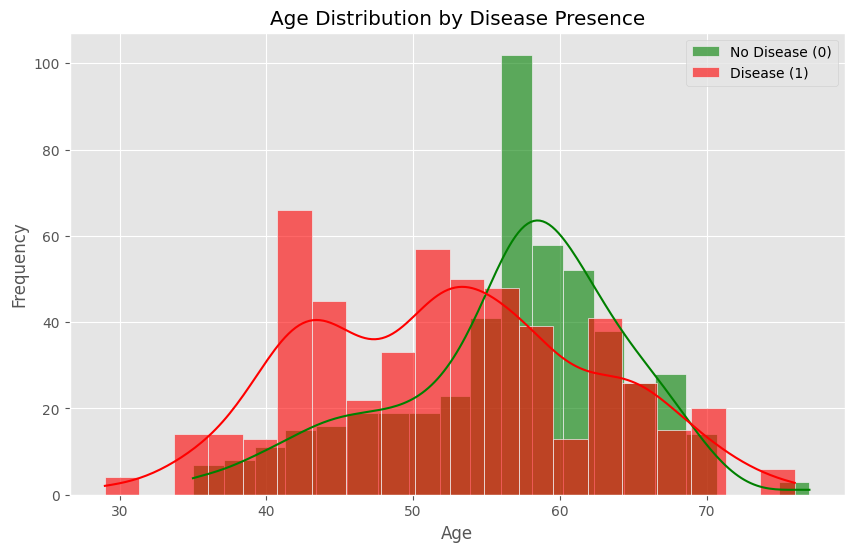

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(no_disease['age'], color='green', label='No Disease (0)', kde=True, bins=20, alpha=0.6)
sns.histplot(disease['age'], color='red', label='Disease (1)', kde=True, bins=20, alpha=0.6)
plt.title('Age Distribution by Disease Presence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

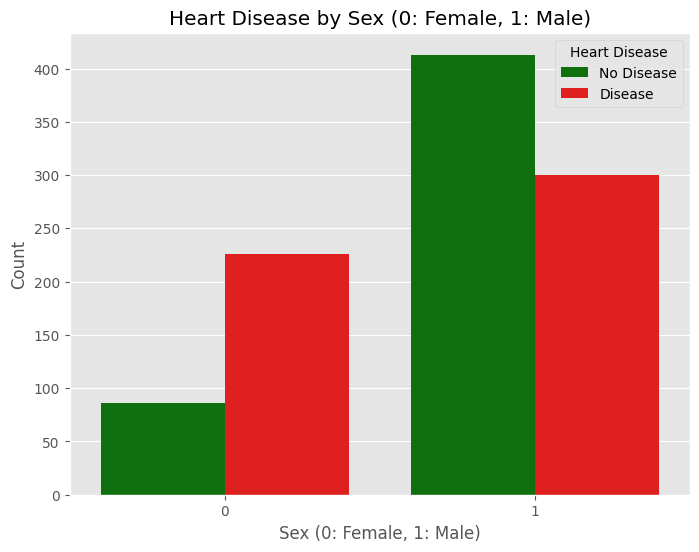

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df, palette={0:'green', 1:'red'})
plt.title('Heart Disease by Sex (0: Female, 1: Male)')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

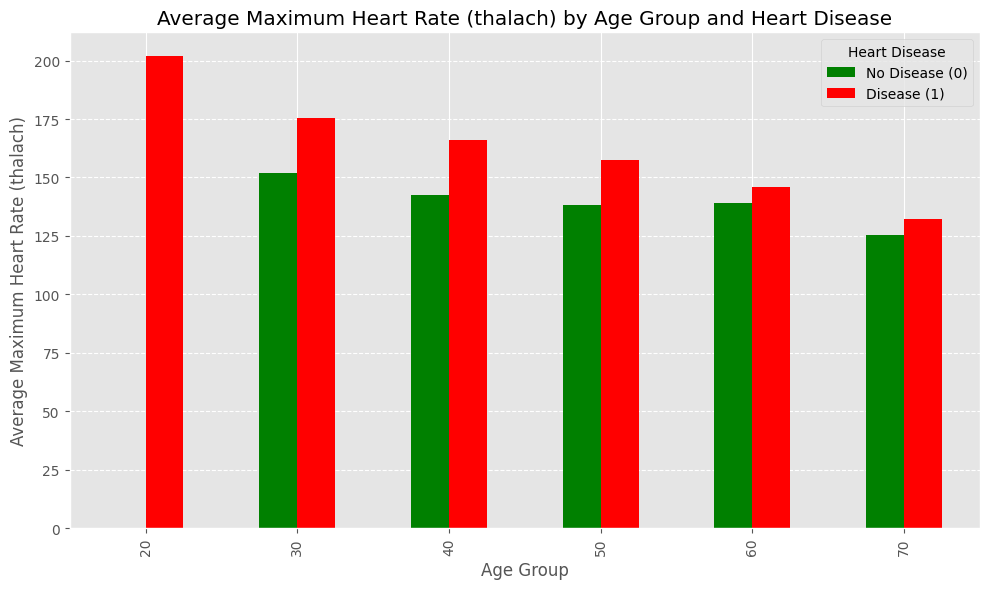

In [14]:
df['age_group'] = (df['age'] // 10) * 10

# 피벗테이블 생성
thalach_comparison = pd.pivot_table(
    df, values='thalach', index='age_group', columns='target', aggfunc='mean'
)
thalach_comparison.columns = ['No Disease (0)', 'Disease (1)']

# 시각화
thalach_comparison.plot(kind='bar', figsize=(10, 6), color=['green', 'red'])
plt.title('Average Maximum Heart Rate (thalach) by Age Group and Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('Average Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()